# Problem statement

Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings. (5 points)
 3. Get the target column distribution. Your comments 
4. Split the data into training and test set in the ratio of 70:30 respectively 
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)


# Importing required libraries 

In [26]:
import pandas as pd # Import pandas as pd
import numpy as np  # Import numpy as np
from sklearn.linear_model import LogisticRegression
#importing seaborn for statistical plots
import seaborn as sns
#To break the X and y dataframes into training set and test set, we will use Sklearn package's data splitting function 
#which is based on random function
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Import module for preprocessing such as encoding, scaling
from sklearn import metrics
# calculate accuracy measures and confusion matrix
import statsmodels.formula.api as smf 
from sklearn.metrics import roc_curve, auc #  To get auc and roc curve
import matplotlib.pyplot as plt # For plotting
%matplotlib inline

# Loading the data

In [27]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv') # Load the data
df.head()  # Look at first 5 record of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Try to understand the data and attributes

In [28]:
df.shape # To understand the shape (number of rows and number of rows columns of the data)

(5000, 14)

In [29]:
df.dtypes # To know the data types of attributes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [30]:
df.isnull().sum() # To check if there are any null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values.

In [31]:
df.describe() # To get the ststistical detail of the data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


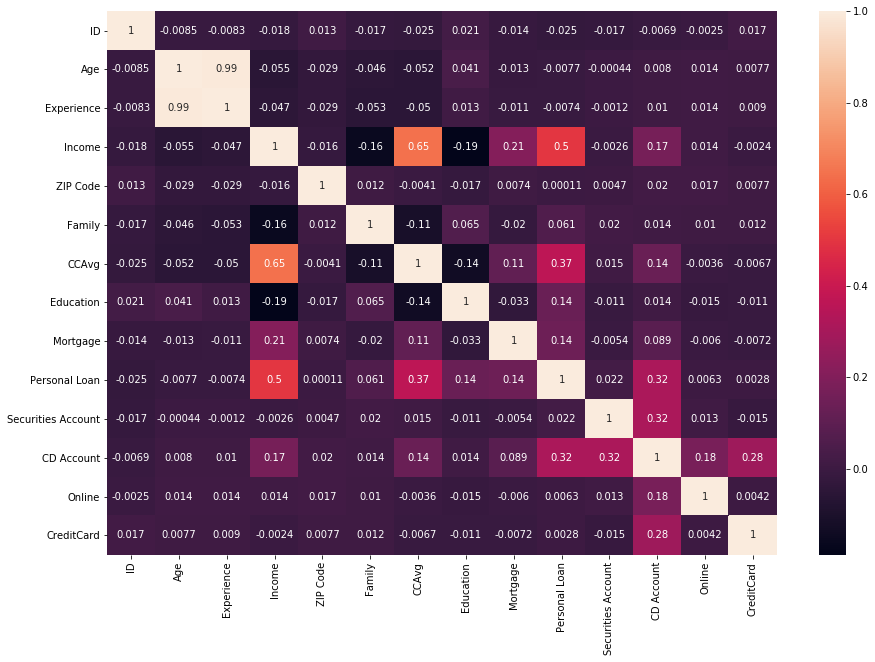

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)  #To get the correlation between all the variables

In problem statement, it is mentioned that,

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.),
the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the 
last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal 
loan that was offered to them in the earliercampaign

# From the above statement, it is cleared that Personal loan is the target column (dependent variable)

In [33]:
print(df['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


0: Not accepted personal loan
1: Accepted personal loan

It is unbalanced dataset, where only 9.6% of records support for Personal Loan=1 (Accepted)
But in terms of banking business perspective, this is a practical number (also can be consider as good conversion)

In [34]:
df.columns # To get all columns of dataframe

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [39]:
print(df['Experience'].value_counts()) # Get the value counts of Experience column

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64


In [26]:
print(df['ZIP Code'].value_counts())
# Most of the members are from first 3 ZIP Codes.

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
92093     51
90245     50
90024     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
93407     26
        ... 
95482      2
91129      2
95307      2
95842      2
91784      2
96094      2
92116      2
94507      2
94575      2
90745      2
93033      2
94019      2
92161      2
91941      2
94116      2
95816      2
91326      2
92705      2
94604      2
90813      1
94404      1
94965      1
9307       1
91024      1
92694      1
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64


Text(0.5, 1.0, 'ZIP code wise counts')

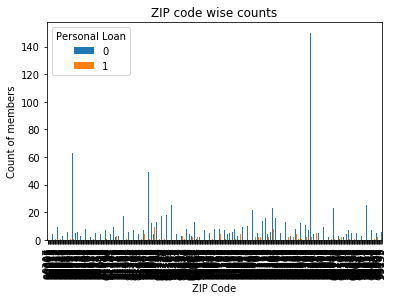

In [37]:
pd.crosstab(df['ZIP Code'],df['Personal Loan']).plot(kind='bar')
plt.ylabel('Count of members')
plt.xlabel('ZIP Code')
plt.title('ZIP code wise counts')
            
# ZIP code doesn't have any impact on personal loan acceptance. 
            

# From the correlation matrix, we can observe that age and experience has very high positive correlation coefficient of 0.99. 
# Since experience column got some negative values (in real which is not true),we can drop experience can keep age instead. 

In [17]:
print(df['CreditCard'].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64


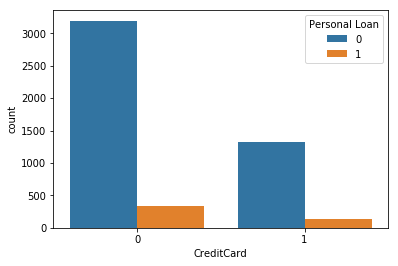

In [37]:
sns.countplot(x='CreditCard', hue='Personal Loan', data=df) # To see if there is any relation between 
# credit card and personal loan; Many don't have credit card; there is no significant relation found between 2. 

In [20]:
print(df['Family'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


Text(0.5, 0, 'Family size')

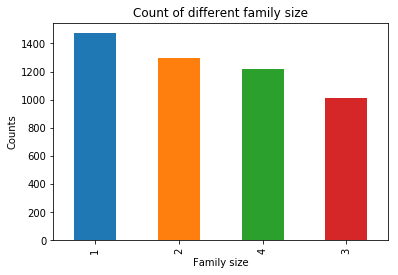

In [35]:
df.Family.value_counts().plot(kind='bar')
plt.title('Count of different family size')
plt.ylabel('Counts')
plt.xlabel('Family size') # Family with 1 has highest counts ; count decreases with increase in family size

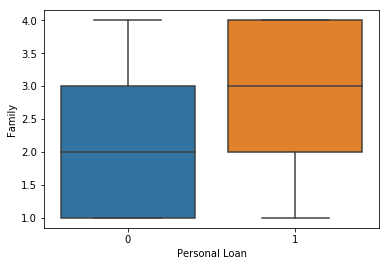

In [40]:
sns.boxplot(x=df['Personal Loan'],y=df['Family'],data=df)
plt.show()  # To check if there is any significance changes in Family number with respect to accepted and not accepted
#members; It is found that median of Family for those accepted loan is higher than that of non acccepted member

In [9]:
df['Securities Account'].value_counts() # There are very less number of securities account

0    4478
1     522
Name: Securities Account, dtype: int64

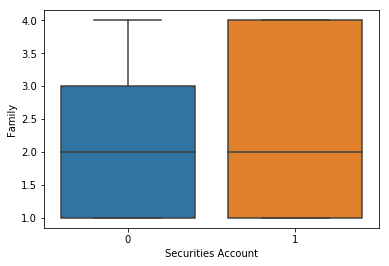

In [21]:
sns.boxplot(x=df['Securities Account'],y=df['Family'],data=df)
plt.show()

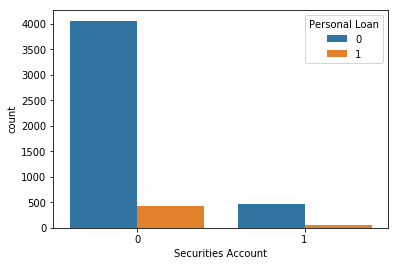

In [20]:
sns.countplot(x='Securities Account', hue='Personal Loan', data=df)
# No significant effect of Securities Account on loan acceptance

In [10]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

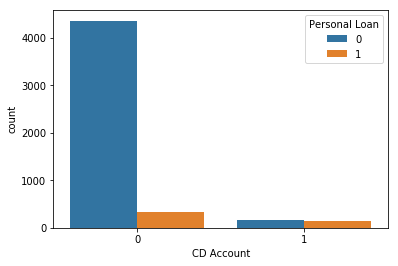

In [13]:
sns.countplot(x='CD Account', hue='Personal Loan', data=df)

# Those who had CD Account are more likely to accept the loan

In [11]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

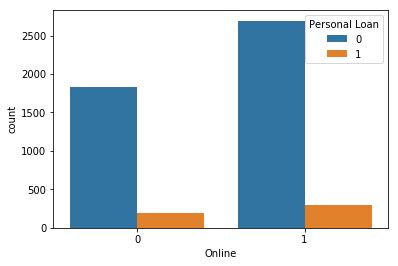

In [12]:
sns.countplot(x='Online', hue='Personal Loan', data=df)
# Online does not have much impact on loan acceptance

In [21]:
print(df['Education'].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64


Text(0.5, 0, 'Education level')

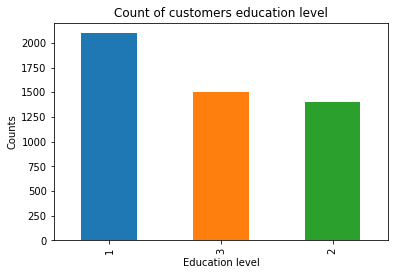

In [33]:
df.Education.value_counts().plot(kind='bar')
plt.title('Count of customers education level')
plt.ylabel('Counts')
plt.xlabel('Education level')

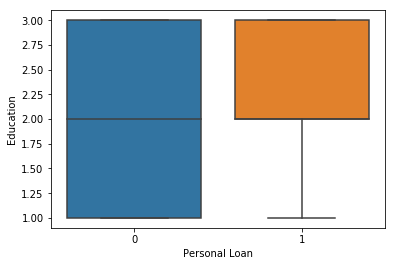

In [41]:
sns.boxplot(x=df['Personal Loan'],y=df['Education'],data=df)
plt.show()
# To check if there is any significance changes in education with accepted and not accepted members

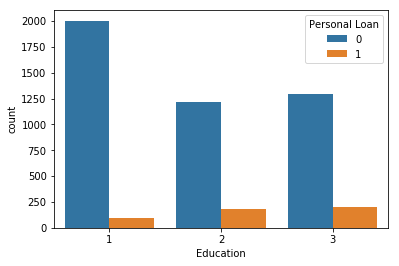

In [16]:
sns.countplot(x='Education', hue='Personal Loan', data=df)
# Eduation does not have impact on acceptance of loan

(array([262., 487., 632., 479., 532., 600., 524., 678., 504., 302.]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <a list of 10 Patch objects>)

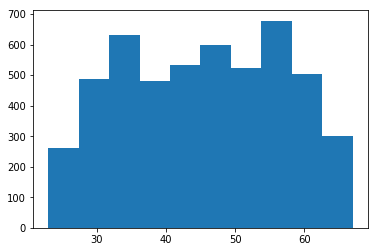

In [42]:
plt.hist(df['Age']) # To check age distribution of customers

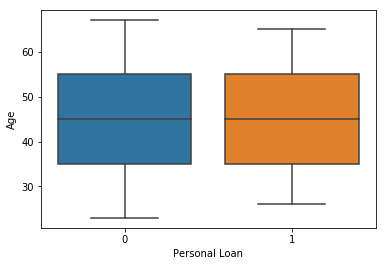

In [31]:
sns.boxplot(x=df['Personal Loan'],y=df['Age'],data=df)
plt.show()
# To check if there is any significance changes in age with accepted and not accepted members
# There is no effect of age on loan acceptance

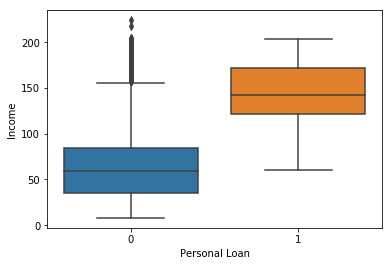

In [34]:
sns.boxplot(x=df['Personal Loan'],y=df['Income'],data=df)
plt.show()
# To check if there is any significance changes in income with accepted and not accepted members
# Icome of those who accepted loan is higher. There are few outliers in the income of those who did not accept loan

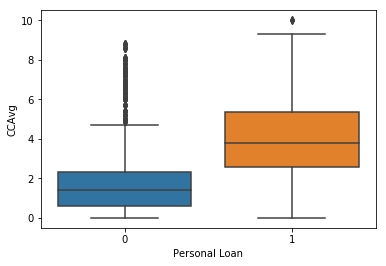

In [35]:
sns.boxplot(x=df['Personal Loan'],y=df['CCAvg'],data=df)
plt.show()
# To check if there is any significance changes in CCAvg with accepted and not accepted members
# CCAVg of loan accepted members is high

# Observations

Columns: 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',              'Securities Account','CD Account', 'Online', 'CreditCard'

1. Those who are having high income and high CCAvg are more likely to accept the personal loan
2. Those who had CD Account are more likely to accept the loan
3. Members who have higher family size may accept loan
4. Age(and hence experirence), Education, Online, Securities Account, Credit card does not have impact on acceptance of
   personal loan
5. ID, ZIP code doesn not contribute for prediction. So, they are not considered in building the model

# Modelling

1. Take dependent and independent variables in X and Y respectively.
2. All variables are numeric, so no need for any kind of encoding such as one hot or label encoding
3. If we go for KNN model, then we have to do scaling
4. For other model, no need of scaling

Columns ID and Zipcode will not help in deciding customers response and rather it would distutb the model as it has many unique values.So we can drop these 2 columns.

In [5]:
X=df[['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage','Securities Account',
       'CD Account', 'Online', 'CreditCard']]
Y=df['Personal Loan']
X.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0


In [6]:
Y.head(2)

0    0
1    0
Name: Personal Loan, dtype: int64

# Splitting to 70:30

In [7]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X1, Y1, test_size=0.3, random_state=2)

# KNN (Requires scaling as it is based on distance calculation)

# Scaling using Zscore

In [8]:
from scipy.stats import zscore
X_Train_scaled = zscore(X_train)
X_Test_scaled = zscore(X_test)

In [9]:
print(X_train.shape,X_Train_scaled.shape,X_test.shape,X_Test_scaled.shape)

(3500, 11) (3500, 11) (1500, 11) (1500, 11)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier()

In [11]:
NNH.fit(X_Train_scaled, Y_train)
predicted = NNH.predict(X_Test_scaled)
accuracy_score = metrics.accuracy_score(Y_test, predicted)
print(accuracy_score)

0.9606666666666667


In [12]:
print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.99      0.58      0.73       138

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.97      0.79      0.85      1500
weighted avg       0.96      0.96      0.96      1500

[[1361    1]
 [  58   80]]


# Scaling using StandardScalar

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X2=pd.DataFrame(sc.fit_transform(X1))
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X2, Y1, test_size=0.3, random_state=2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10
2416,1.279146,1.299002,-0.907560,-1.216855,-0.937312,1.332484,0.231075,-0.341423,-0.25354,0.821951,-0.645314
2417,-1.774417,-1.753287,-0.451327,-0.345432,-0.193385,1.332484,-0.555524,-0.341423,-0.25354,0.821951,1.549632


In [15]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier()

In [16]:
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
predicted = NNH.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, predicted)

In [18]:
print(accuracy_score)

0.9573333333333334


In [19]:
print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.99      0.54      0.70       138

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.97      0.77      0.84      1500
weighted avg       0.96      0.96      0.95      1500

[[1361    1]
 [  63   75]]


# Other models (Logistic, Naïve Bayes, DecisionTreeClassifier and RandomForestClassifier) 

In [20]:
X=df[['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage','Securities Account',
       'CD Account', 'Online', 'CreditCard']]
Y=df['Personal Loan']

In [21]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=2)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


In [24]:
classifiers=[]
model1 = LogisticRegression()
classifiers.append(model1)
model2 = GaussianNB()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [25]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is:  %s "%(clf, acc))
    print('\n')
    print (confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('\n')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is:  0.942 


[[1340   22]
 [  65   73]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1362
           1       0.77      0.53      0.63       138

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.86      0.76      0.80      1500
weighted avg       0.94      0.94      0.94      1500



Accuracy of GaussianNB(priors=None, var_smoothing=1e-09) is:  0.8906666666666667 


[[1264   98]
 [  66   72]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.42      0.52      0.47       138

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69  

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) is:  0.982 


[[1362    0]
 [  27  111]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1362
           1       1.00      0.80      0.89       138

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.99      0.90      0.94      1500
weighted avg       0.98      0.98      0.98      1500





# Conclusion

By comparing the results obtained by applying different models, it is observed that,

1. Decision classifier, Random forest model, and KNN are giving high accuracy of 0.981, 0.982, and 0.96 respectively.
   Decision classifiers and Random forsests are advanced machine learning models and here focus is mainly to get good
   accuracy with the trade of explanatory power.
    
2. Since these models are having low explanatory power, and if the bank wants to know how exactly model is working, then we    can go for traitional methods such as Logistic or Naive Bayes 
    
3. In simple model, Logistic gives highest accuracy of 0.94 as compared to and Naive Bayes(0.89). 

4. Out of Logistic, K-NN and Naïve Bayes, KNN works better

Reasons might be:

1. KNN works well for small dataset (Here we have 5000 records)
2. k-NN performs much better if all of the data have the same scale. Since we have done scaling before feeding the values
   to KNN, it is performing well.
3. k-NN makes no assumptions about the functional form of the problem being solved; When there is no pre assumptions
   model will work better.
   
   
Here our focus(objective) should be to minimise the type II error(False Negative or beta) where actual loan accepters are 
predicted as non acceptors. This will be the costly error as bank may loose loan acceptors.Decision Tree is making very
less type II error. In simple models, KNN is making less type II error.